https://towardsdatascience.com/interpreting-image-classification-model-with-lime-1e7064a2f2e5

https://www.kaggle.com/abhinavsp0730/why-i-trust-you

In [41]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation,BatchNormalization
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

import skimage

In [2]:
# Path to train and test directory
dir_ = os.path.join('Dog-cat-panda')

In [3]:
# Generate training and test data with image generator
train_datagen = ImageDataGenerator(rescale=1/255,validation_split = 0.2)

In [4]:
train_generator = train_datagen.flow_from_directory(dir_,target_size=(100,100),
                                                   batch_size = 1920, class_mode='categorical',
                                                   shuffle = False, subset = 'training')

Found 2400 images belonging to 3 classes.


In [5]:
test_generator = train_datagen.flow_from_directory(dir_, target_size=(100,100),
                                                  batch_size=480,class_mode = 'categorical',
                                                  shuffle = False,
                                                  subset = 'validation')

Found 600 images belonging to 3 classes.


In [6]:
#Fetch the data and labels
x_train,y_train = next(train_generator) # next returns the next item from the iterator
x_test,y_test = next(test_generator)

# Fix the file path
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace("\\",'/')
    test_filepath.append(filepath)
    

In [7]:
test_filepath

['Dog-cat-panda/cats/cats_00001.jpg',
 'Dog-cat-panda/cats/cats_00002.jpg',
 'Dog-cat-panda/cats/cats_00003.jpg',
 'Dog-cat-panda/cats/cats_00004.jpg',
 'Dog-cat-panda/cats/cats_00005.jpg',
 'Dog-cat-panda/cats/cats_00006.jpg',
 'Dog-cat-panda/cats/cats_00007.jpg',
 'Dog-cat-panda/cats/cats_00008.jpg',
 'Dog-cat-panda/cats/cats_00009.jpg',
 'Dog-cat-panda/cats/cats_00010.jpg',
 'Dog-cat-panda/cats/cats_00011.jpg',
 'Dog-cat-panda/cats/cats_00012.jpg',
 'Dog-cat-panda/cats/cats_00013.jpg',
 'Dog-cat-panda/cats/cats_00014.jpg',
 'Dog-cat-panda/cats/cats_00015.jpg',
 'Dog-cat-panda/cats/cats_00016.jpg',
 'Dog-cat-panda/cats/cats_00017.jpg',
 'Dog-cat-panda/cats/cats_00018.jpg',
 'Dog-cat-panda/cats/cats_00019.jpg',
 'Dog-cat-panda/cats/cats_00020.jpg',
 'Dog-cat-panda/cats/cats_00021.jpg',
 'Dog-cat-panda/cats/cats_00022.jpg',
 'Dog-cat-panda/cats/cats_00023.jpg',
 'Dog-cat-panda/cats/cats_00024.jpg',
 'Dog-cat-panda/cats/cats_00025.jpg',
 'Dog-cat-panda/cats/cats_00026.jpg',
 'Dog-cat-pa

In [8]:
train_generator.filepaths

['Dog-cat-panda\\cats\\cats_00201.jpg',
 'Dog-cat-panda\\cats\\cats_00202.jpg',
 'Dog-cat-panda\\cats\\cats_00203.jpg',
 'Dog-cat-panda\\cats\\cats_00204.jpg',
 'Dog-cat-panda\\cats\\cats_00205.jpg',
 'Dog-cat-panda\\cats\\cats_00206.jpg',
 'Dog-cat-panda\\cats\\cats_00207.jpg',
 'Dog-cat-panda\\cats\\cats_00208.jpg',
 'Dog-cat-panda\\cats\\cats_00209.jpg',
 'Dog-cat-panda\\cats\\cats_00210.jpg',
 'Dog-cat-panda\\cats\\cats_00211.jpg',
 'Dog-cat-panda\\cats\\cats_00212.jpg',
 'Dog-cat-panda\\cats\\cats_00213.jpg',
 'Dog-cat-panda\\cats\\cats_00214.jpg',
 'Dog-cat-panda\\cats\\cats_00215.jpg',
 'Dog-cat-panda\\cats\\cats_00216.jpg',
 'Dog-cat-panda\\cats\\cats_00217.jpg',
 'Dog-cat-panda\\cats\\cats_00218.jpg',
 'Dog-cat-panda\\cats\\cats_00219.jpg',
 'Dog-cat-panda\\cats\\cats_00220.jpg',
 'Dog-cat-panda\\cats\\cats_00221.jpg',
 'Dog-cat-panda\\cats\\cats_00222.jpg',
 'Dog-cat-panda\\cats\\cats_00223.jpg',
 'Dog-cat-panda\\cats\\cats_00224.jpg',
 'Dog-cat-panda\\cats\\cats_00225.jpg',


### Create a custom model

In [9]:
model = Sequential()

#First conv layer
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Second conv layer
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third conv layer
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Hidden Dense layer
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

# Output neuron
model.add(Dense(3,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [11]:
# Compile and train the model

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator,
                   epochs=80,
                   verbose=1,
                   batch_size=64)

Epoch 1/80
2/2 [==============================] - 20s 16s/step - loss: 2.9607 - accuracy: 0.3154
Epoch 2/80
2/2 [==============================] - 22s 2s/step - loss: 2.2465 - accuracy: 0.2778
Epoch 3/80
2/2 [==============================] - 15s 2s/step - loss: 1.1718 - accuracy: 0.2778
Epoch 4/80
2/2 [==============================] - 13s 10s/step - loss: 1.0642 - accuracy: 0.5558
Epoch 5/80
2/2 [==============================] - 13s 2s/step - loss: 1.0952 - accuracy: 0.2778
Epoch 6/80
2/2 [==============================] - 13s 10s/step - loss: 1.0425 - accuracy: 0.5556
Epoch 7/80
2/2 [==============================] - 13s 2s/step - loss: 1.0894 - accuracy: 0.2778
Epoch 8/80
2/2 [==============================] - 13s 2s/step - loss: 1.0993 - accuracy: 0.2778
Epoch 9/80
2/2 [==============================] - 21s 2s/step - loss: 1.1767 - accuracy: 0.2778
Epoch 10/80
2/2 [==============================] - 20s 2s/step - loss: 1.2869 - accuracy: 0.2778
Epoch 11/80
2/2 [===================

In [13]:
model.save('model_animal.h5')

In [14]:
history.history['loss']

[3.9114696979522705,
 2.1105213165283203,
 1.1553157567977905,
 1.0919675827026367,
 1.0863890647888184,
 1.0912035703659058,
 1.063896656036377,
 1.0580615997314453,
 1.1141653060913086,
 1.2091798782348633,
 1.2044105529785156,
 1.1789379119873047,
 1.1482285261154175,
 1.1109161376953125,
 1.035010576248169,
 1.0065397024154663,
 1.0322924852371216,
 1.029963731765747,
 1.1098748445510864,
 1.1003657579421997,
 1.0243891477584839,
 1.0012468099594116,
 0.9567266702651978,
 0.9445899724960327,
 0.9567238092422485,
 0.9522703886032104,
 1.006037712097168,
 1.009326457977295,
 0.9739376902580261,
 0.957772433757782,
 0.9482423663139343,
 0.9146414995193481,
 0.9128209352493286,
 0.9303774833679199,
 0.9534103274345398,
 0.9609366655349731,
 0.941787838935852,
 0.9138695001602173,
 0.9065962433815002,
 0.8811642527580261,
 0.890049934387207,
 0.8872616291046143,
 0.8822444677352905,
 0.8820971846580505,
 0.8888491988182068,
 0.8882974982261658,
 0.883553683757782,
 0.8990116119384766,
 

Text(0, 0.5, 'loss')

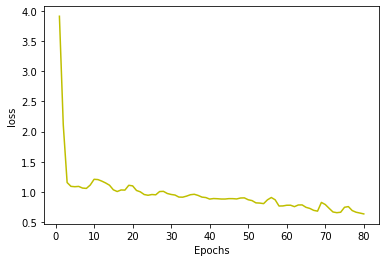

In [20]:
loss = history.history['loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.xlabel("Epochs")
plt.ylabel("loss")

Text(0, 0.5, 'Accuracy')

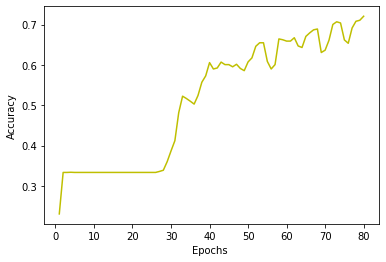

In [22]:
accuracy = history.history['accuracy']
epochs = range(1,len(loss)+1)
plt.plot(epochs,accuracy,'y',label='Training accuracy')
plt.xlabel("Epochs ")
plt.ylabel('Accuracy')

In [79]:
from skimage import io
from tensorflow.keras.preprocessing import image
import skimage.transform

url = 'Dog-cat-panda/dogs/dogs_00052.jpg'

def read_and_transform_img(url):

    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (100,100))
    
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)

if prediction == 0:
    print('It\'s a cat!')
elif prediction == 1:
    print('It\'s a dog!')
else:
    print('It\'s a panda!')

print(pct)

It's a dog!
0.4631209


In [80]:
from lime import lime_image

explainer = lime_image.LimeImageExplainer()

In [81]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

#### `images` — The image that we want LIME to explain.
#### `classifier_fn` — Your image classier prediction function.
#### `top_labels` — The n###umber of labels that you want LIME to show. If it’s 3, then it will only show the top 3 labels with highest probabilities and ignore the rest.
#### `num_samples` — to determine the amount of artificial data points similar to our input that will be generated by LIME.

(-0.5, 99.5, 99.5, -0.5)

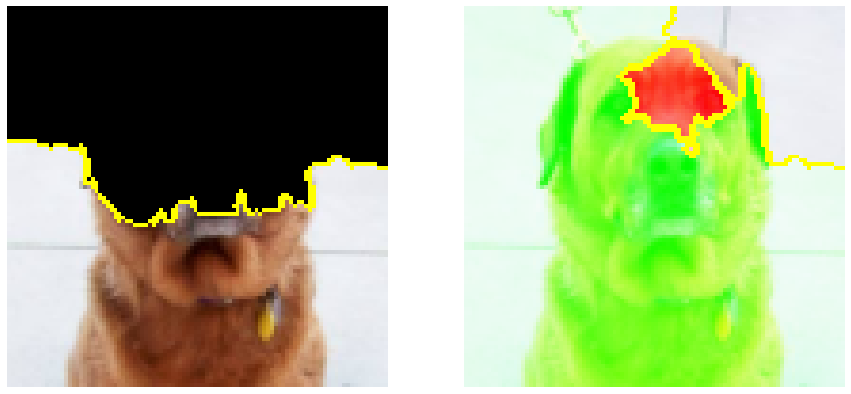

In [82]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

 On the left image, we can see that only the super-pixels where the `correct label(it can be dog cat or panda)` is visible are shown. This means that our model classifies our image as a `correct label` because of these parts of super-pixels.

On the right image, the area of super-pixels colored in green are the ones that increase the probability of our image belongs to a correct class, while the super-pixels colored in red are the ones that decrease the probability.